# Analysing Nasa's meteorites dataset using pandas, seaborn and matplotlib

For download and more information, go to this link https://www.kaggle.com/nasa/meteorite-landings

Some questions explored here are:
* What's the most common type of meteorite?
* What's the heaviest meteorite? How heavy is it?
* What's the max number of fallen meteorites in a year? When did this happen?
* What's the oldest meteorite logged?
* Is there a region of the world that has more meteorites?

In [1]:
# importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# transforming the file in a dataframe
meteorites = pd.read_csv('./meteorite-landings.csv')

# showing the first five rows
meteorites.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


The variables description provided by the page is:

* __name__: the name of the meteorite (typically a location, often modified with a number, year, composition, etc)
* __id__: a unique identifier for the meteorite
* __nametype__: one of: 
    - valid: a typical meteorite 
    - relict: a meteorite that has been highly degraded by weather on Earth
* __recclass__: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics (see the Wikipedia article on meteorite classification for a primer)
* __mass__: the mass of the meteorite, in grams
* __fall__: whether the meteorite was seen falling, or was discovered after its impact; one of: 
    - Fell: the meteorite's fall was observed 
    - Found: the meteorite's fall was not observed
* __year__: the year the meteorite fell, or the year it was found (depending on the value of fell)
* __reclat__: the latitude of the meteorite's landing
* __reclong__: the longitude of the meteorite's landing
* __GeoLocation__: a parentheses-enclose, comma-separated tuple that combines reclat and reclong

They also specify some registers that are invalid. The code below discards them.

In [3]:
# throwing away the meteorites with reclat and reclong equals zero
meteorites_cleaned = meteorites.loc[(meteorites.reclat != 0) & (meteorites.reclong != 0), :]

# throwing away the rows containing NaN
meteorites_cleaned = meteorites_cleaned.dropna(axis = 0)

# discarding meteorites found before 860 and after 2016
meteorites_cleaned = meteorites_cleaned.loc[(meteorites.year > 860) & (meteorites.year < 2016), :]

# maintaining valids masses
meteorites_cleaned = meteorites_cleaned.loc[meteorites.mass > 0, :]

# some class were registered with a '?', let's discard them too.
meteorites_cleaned = meteorites_cleaned.loc[meteorites.recclass.map(lambda r: '?' not in r), :]

# changing the year column type from float to int
meteorites_cleaned.year = meteorites_cleaned.year.astype(int)

In [4]:
quant_meteorites = len(meteorites_cleaned)
print('Remaining data: ', quant_meteorites)
print('Original quantity: ', len(meteorites))
print(f'Remaining data percentage: {len(meteorites_cleaned)/len(meteorites):.2}')

Remaining data:  31665
Original quantity:  45716
Remaining data percentage: 0.69


In [5]:
# replacing our original data for the cleaned one
meteorites = meteorites_cleaned

### Hands-on!
## 1. How many meteorites were severely degraded?

In [6]:
# counting valids and relicts
meteorites.nametype.value_counts()

Valid     31662
Relict        3
Name: nametype, dtype: int64

## 2. What's the most common type? Are there more found meteorites or fallen?

Text(0.5, 1.0, 'Most common types of meteorites')

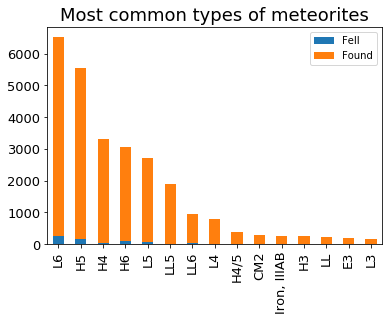

In [7]:
# creating a DataFrame with two columns, Fell and Found, that contain the number of meteorites in each class.
# The index are the classes, in descending order of numbers of meteorites. The DataFrame has only the first
# sixteen classes.
fell_vs_found = pd.DataFrame(
    {
        'Fell': meteorites.loc[meteorites.fall == 'Fell', 'recclass'].value_counts(),
        'Found': meteorites.loc[meteorites.fall == 'Found', 'recclass'].value_counts()
    }, index = meteorites.recclass.value_counts().index
).head(15)


# plotting a bar diagram
most_common_class = fell_vs_found.plot.bar(stacked = True, fontsize = 13)
most_common_class.set_title('Most common types of meteorites', fontsize = 18)

## 3. Wow, the great marjory of meteorites were discovered, but how many exactly?

In [8]:
# counting the number of found and fell
found = meteorites.fall.value_counts().Found
fell = meteorites.fall.value_counts().Fell
print('Found: ', found)
print('Fell: ', fell)

# calculating the percentage
print(f'fell percentage: {fell/found:.3}')

Found:  30604
Fell:  1061
fell percentage: 0.0347


## 4. What's the heaviest meteorite? How heavy is it?

In [9]:
# showing the meteorite with the haviest mass found
meteorites.loc[meteorites.mass == meteorites.mass.max(), :]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
16383,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920,-19.58333,17.91667,"(-19.583330, 17.916670)"


## 5. And how about the lightest meteorite?

In [10]:
# showing the meteorite with the lightest mass found
meteorites.loc[meteorites.mass == meteorites.mass.min(), :]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
42689,Yamato 8333,29438,Valid,H5,0.01,Found,1983,-71.5,35.66667,"(-71.500000, 35.666670)"


## 5. What's the mean weight?

In [11]:
# returning the mean of the mass column, in grams
print(f'Mean weigth: {meteorites.mass.mean():.6}')

Mean weigth: 18695.5


## 6. What's the oldest meteorite logged?

In [12]:
# looking for the minimum year and then, finding the respective meteorite
meteorites.loc[meteorites.year == meteorites.year.min(), :]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,1399,50.18333,12.73333,"(50.183330, 12.733330)"


## 7. When did we start to look for meteorites?

Text(0.5, 1.0, "Found Meteorites' timeline")

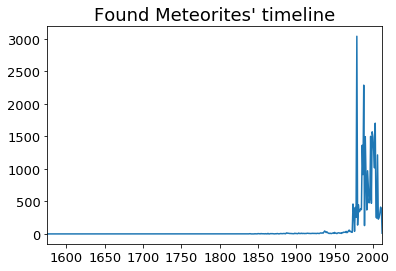

In [13]:
# separating just found meteorites and their year
found_meteorites_kde = meteorites.loc[meteorites.fall == 'Found', 'year']

# counting the number of meteorites for each year, sorting in ascending order
found_meteorites_line = found_meteorites_kde.value_counts().sort_index()

# plotting the number of meteorites over the time
found_meteorites_line.plot.line(fontsize = 13).set_title("Found Meteorites' timeline", fontsize = 18)

### Hmmm, let's take a closer look.

Text(0.5, 1.0, 'Meteorites found in the last 50 years')

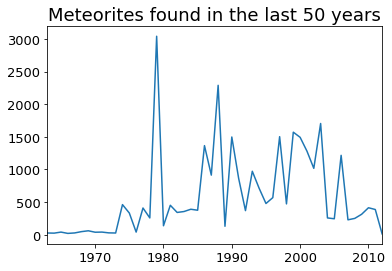

In [14]:
# showing just the last 50 years
found_meteorites_line.tail(50).plot.line(fontsize = 13).set_title("Meteorites found in the last 50 years", fontsize = 18)

## 8. What's the max number of meteorites found in a year? When did this happen?

In [15]:
# sorting the number of meteorites in descending order and showing the years with the greatests, as their number
found_meteorites_line.sort_values(ascending = False).head(3)

1979    3041
1988    2289
2003    1704
Name: year, dtype: int64

## 9. The last graph highlights the number os meteorites found in the year. How about the total percentage?

Text(0.5, 1.0, "Found Meteorites' timeline - percentage")

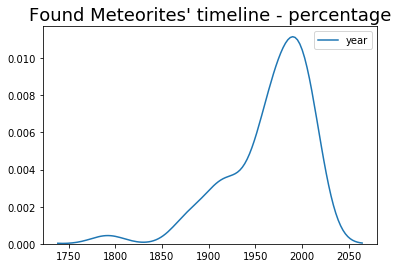

In [16]:
# the last diagram focus on numbers, on the other hand, this shows the distribution, also for the last 50 years
sns.kdeplot(found_meteorites_kde.tail(50)).set_title("Found Meteorites' timeline - percentage", fontsize = 18)

## 10. Doing the same with fallen meteorites...

Text(0.5, 1.0, "Fallen Meteorites' timeline")

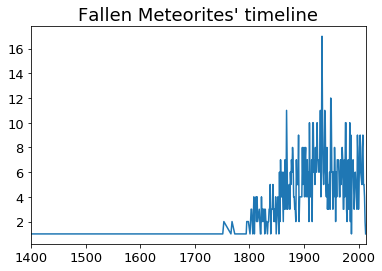

In [17]:
# separating just fallen meteorites and their year
fell_meteorites_kde = meteorites.loc[meteorites.fall == 'Fell', 'year']

# counting the number of meteorites for each year, sorting in ascending order
fell_meteorites_line = fell_meteorites_kde.value_counts().sort_index()

# plotting the number of meteorites over the time
fell_meteorites_line.plot.line(fontsize = 13).set_title("Fallen Meteorites' timeline", fontsize = 18)

Text(0.5, 1.0, 'Meteorites fallen in the last 220 years')

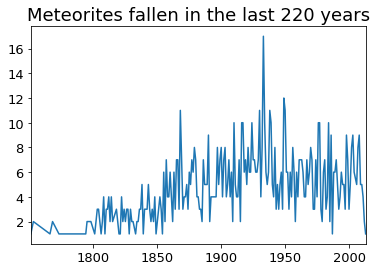

In [18]:
# showing just the last 220 years
fell_meteorites_line.tail(220).plot.line(fontsize = 13).set_title("Meteorites fallen in the last 220 years", fontsize = 18)

## 11. What's the max number of fallen meteorites in a year? When did this happen?¶

In [19]:
# sorting the number of meteorites in descending order and showing the years with the greatests, as their number
fell_meteorites_line.sort_values(ascending = False).head(3)

1933    17
1949    12
1868    11
Name: year, dtype: int64

## 12. The percentage graphic expanded.

Text(0.5, 1.0, "Fallen Meteorites' timeline - percentage")

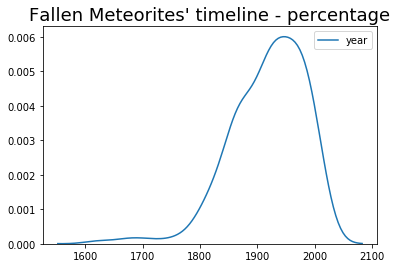

In [20]:
# the last diagram focus on numbers, on the other hand, this shows the distribution, also for the last 220 years
sns.kdeplot(fell_meteorites_kde.tail(220)).set_title("Fallen Meteorites' timeline - percentage", fontsize = 18)

## 13. What's the mean mass of the 6 most common types?

In [21]:
# selecting only the 6 most common types
common_classes = meteorites.recclass.isin(['L6', 'H5', 'H4', 'H6', 'L5', 'LL5'])

# selecting the columns recclass and mass
class_and_mass_common = meteorites.loc[common_classes, ['recclass', 'mass']]

# grouping the meteorites according to their classes, calculating the mean mass for each group and sorting it
# in descending order
class_and_mass_common.groupby('recclass').mean().sort_values(by = 'mass', ascending = False)

,mass
recclass,
L5,2832.225691
H5,2580.641420
L6,1708.533313
H6,1177.416112
H4,1099.203448
LL5,504.137045


## 14. What's the mean mass of the 6 heaviest types?

In [22]:
# selecting all the meteorites, columns recclass and mass
class_and_mass_all = meteorites.loc[:, ['recclass', 'mass']]

# grouping the meteorites according to their classes, calculating the mean mass for each group, sorting it
# in descending order and showing only the first six
class_and_mass_all.groupby('recclass').mean().sort_values(by = 'mass', ascending = False).head(6)

,mass
recclass,
"Iron, IVB",4.322833e+06
"Iron, IIIE",2.409610e+06
"Iron, IAB-MG",1.470272e+06
"Iron, IC",9.911222e+05
"Iron, IAB-ung",7.693243e+05
Mesosiderite-A1,6.982063e+05


## 15. Are there how many meteorites of each heaviest class?

In [23]:
# creating a boolean index, comparing if each class in meteorites DataFrame is a Iron class
heaviest_classes = meteorites.recclass.isin([
    'Iron, IVB',
    'Iron, IIIE',
    'Iron, IAB-MG',
    'Iron, IC',
    'Iron, IAB-ung'
])

# selecting only the iron meteorites, columns recclass and mass 
class_and_mass_heaviest = meteorites.loc[heaviest_classes, ['recclass', 'mass']]

# grouping the meteorites by class and counting the group size
class_and_mass_heaviest.groupby('recclass').count()

,mass
recclass,
"Iron, IAB-MG",73
"Iron, IAB-ung",41
"Iron, IC",9
"Iron, IIIE",12
"Iron, IVB",14


## 16. Is there any relation between class and year?

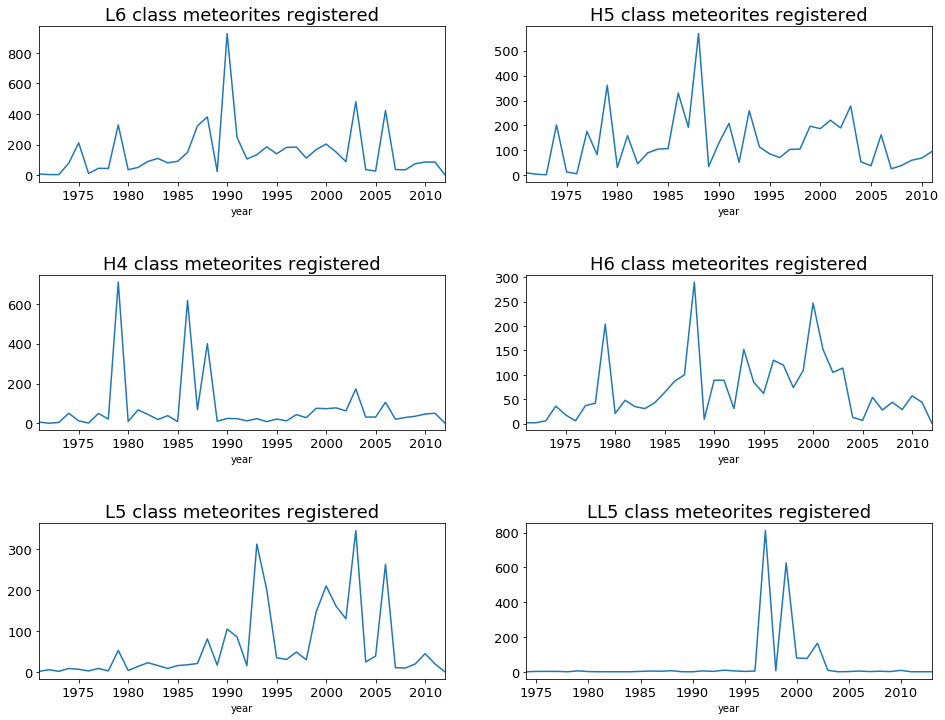

In [24]:
# selecting the meteorites from the six most common classes, columns recclass and year
class_and_year_kde = meteorites.loc[common_classes, ['recclass', 'year']]

# discarting meteorites found/fallen before 1970
class_and_year_kde = class_and_year_kde.loc[meteorites.year > 1970, :]

# grouping according to the class and couting the number of meteorites for each year, sorting in ascending order
class_and_year = class_and_year_kde.groupby('recclass').year.value_counts().sort_index()

# plotting a diagram for each class
fig, axarr = plt.subplots(3, 2, figsize = (16, 12))

class_and_year.L6.plot.line(ax = axarr[0][0], fontsize = 13)
axarr[0][0].set_title('L6 class meteorites registered', fontsize = 18)

class_and_year.H5.plot.line(ax = axarr[0][1], fontsize = 13)
axarr[0][1].set_title('H5 class meteorites registered', fontsize = 18)

class_and_year.H4.plot.line(ax = axarr[1][0], fontsize = 13)
axarr[1][0].set_title('H4 class meteorites registered', fontsize = 18)

class_and_year.H6.plot.line(ax = axarr[1][1], fontsize = 13)
axarr[1][1].set_title('H6 class meteorites registered', fontsize = 18)

class_and_year.L5.plot.line(ax = axarr[2][0], fontsize = 13)
axarr[2][0].set_title('L5 class meteorites registered', fontsize = 18)

class_and_year.LL5.plot.line(ax = axarr[2][1], fontsize = 13)
axarr[2][1].set_title('LL5 class meteorites registered', fontsize = 18)

plt.subplots_adjust(hspace=.6)

### Again, comparing the numbers and the total percentage...

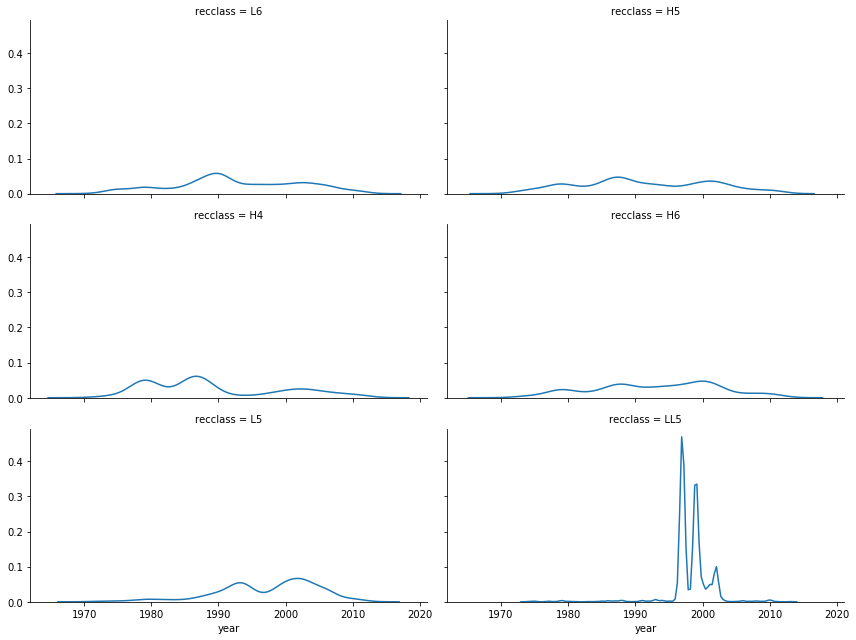

In [25]:
# plotting a different kind of diagram for each class
g = sns.FacetGrid(class_and_year_kde,
                  col = 'recclass',
                  col_wrap = 2,
                  aspect = 2,
                  col_order = ['L6', 'H5', 'H4', 'H6', 'L5', 'LL5'])
g.map(sns.kdeplot, 'year')

## 17. Is there a region of the world that has more meteorites?

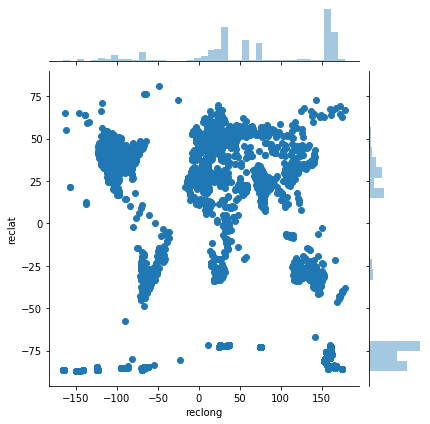

In [26]:
# selecting all meteorites, columns reclat and reclong
locations = meteorites.loc[:, ['reclat', 'reclong']]

# plotting the location of each meteorite
sns.jointplot(x = 'reclong', y = 'reclat', data = locations)

## 18. What if we look separeted at found and fallen meteorites?
### Found

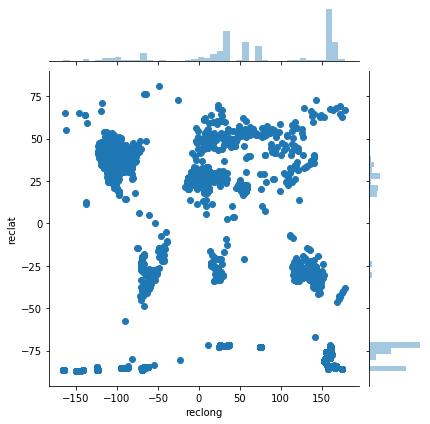

In [27]:
# selecting found meteorites, columns reclat and reclong
found = meteorites.loc[meteorites.fall == 'Found', ['reclat', 'reclong']]

# plotting the location of each meteorite
sns.jointplot(x = 'reclong', y = 'reclat', data = found)

### Fallen

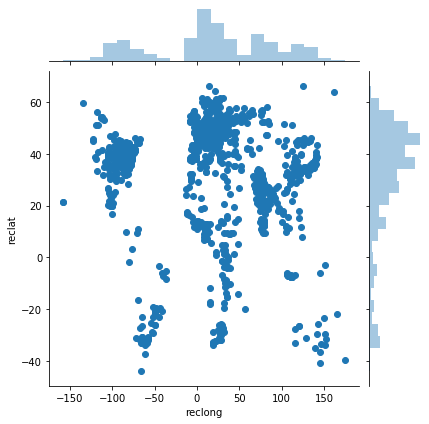

In [28]:
# selecting fallen meteorites, columns reclat and reclong
fell = meteorites.loc[meteorites.fall == 'Fell', ['reclat', 'reclong']]

# plotting the location of each meteorite
sns.jointplot(x = 'reclong', y = 'reclat', data = fell)

# Conclusions

The original data has 45716 meteorites registered, after cleaned, it has 31665 (69%). Only three meteorites were severely degraded by the weather, so it's not necessary to worry about it in the analysis.

The most common types are, in descending order, L6, H5, H4, H6, L5 and LL5, moreover, the great majority of meteorites was found, and not seen falling. In comparison, the number of fallen meteorites is almost insignificant (3%).

The heaviest meteorite Hoba weighs 60 tonnes, and the lightest, Yamato 8333, 0.01g. The mean weight of all meteorites is 18.7kg.

The oldest meteorite in the dataset is Elbogen, which fell in 1399. That's the oldest register, but humanity should know meteorites since a long time before. As the meteorites registered like found are after 1970, there are two hypotheses: the community started to look for them just in 1970, or the registers started in that year. But, Elbogen is from 1399, so let's assume that after 1970 the meteorites hunts began, and in a year (1979), the maximum number of meteorites found was 3041. Great part of this category is from aproximately 1990.

What about fallen meteorites? The registers begin after ~1750 (well before!). The maximum number in a year is 17 (1933) and great part of this category is from aproximately 1950.

Comparing the mean mass of the six most common classes, L5 and H5 are the heaviest, with, respectively, 2.8 and 2.6kg. The heaviest meteorites are made from Iron. The "Iron, IVB" class has mean mass of 4.3 tonnes, but it has only 14 meteorites registered. "Iron, IAB-MG", on the other hand, has 73 registers and mean mass of 1.5 ton.

In the first group of graphs, from question 16, is visible that in just a year, a lot of meteorites can be found. At the highest points, more than 500, 800... depending on the class. Looking at the second, nothing not normal with the distribution, except for the LL5 class, with a jump near to the year 2000.

Antarctica is the region of the continent with more meteorites registered. If we separate found and fallen, because found is the great majority, what leads to masking the fallen, it's visible that Antarctica has more found meteorites registers, while Europe and the north of Africa, fallen.